   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00
Pada suhu 28°C dan kelembapan 65%, kecepatan kipas direkomendasikan: 70.96%


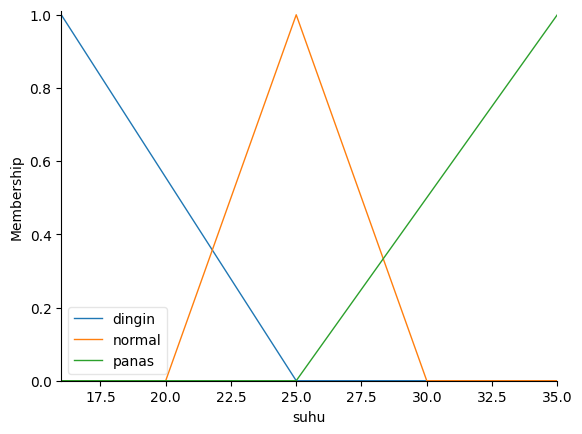

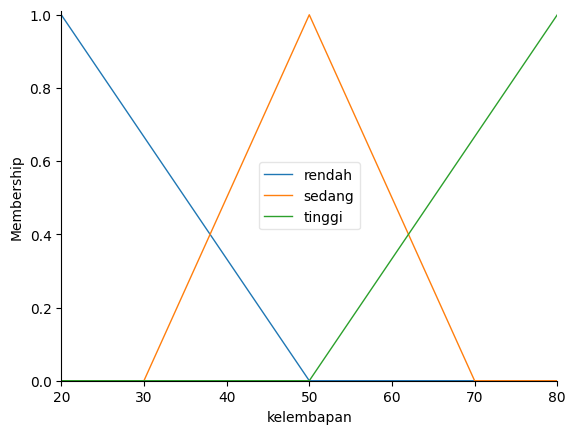

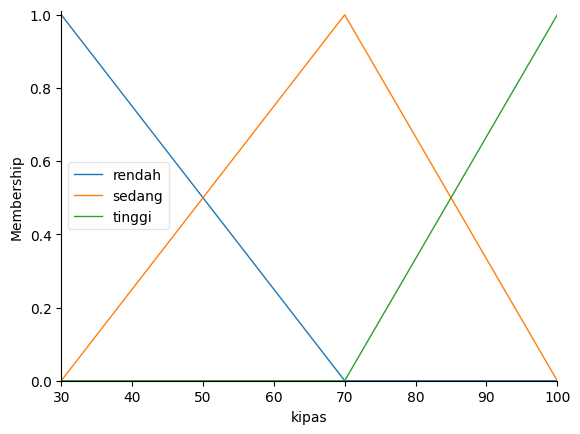

In [1]:
# Pastikan pustaka scikit-fuzzy sudah terinstal
!pip install -U scikit-fuzzy

# Import pustaka yang dibutuhkan
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# 1. Definisi Variabel Fuzzy
# Variabel input: suhu (dalam °C) dan kelembapan (dalam %)
suhu = ctrl.Antecedent(np.arange(16, 36, 1), 'suhu')
kelembapan = ctrl.Antecedent(np.arange(20, 81, 1), 'kelembapan')

# Variabel output: kecepatan kipas (dalam %), dengan skala 30-70-100
kipas = ctrl.Consequent(np.arange(30, 101, 1), 'kipas')

# 2. Definisi Himpunan Fuzzy
# Suhu dikelompokkan menjadi 3 kategori: dingin, normal, panas
suhu['dingin'] = fuzz.trimf(suhu.universe, [16, 16, 25])
suhu['normal'] = fuzz.trimf(suhu.universe, [20, 25, 30])
suhu['panas'] = fuzz.trimf(suhu.universe, [25, 35, 35])

# Kelembapan dikelompokkan menjadi: rendah, sedang, tinggi
kelembapan['rendah'] = fuzz.trimf(kelembapan.universe, [20, 20, 50])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [30, 50, 70])
kelembapan['tinggi'] = fuzz.trimf(kelembapan.universe, [50, 80, 80])

# Kecepatan kipas dikelompokkan menjadi: 30 (rendah), 70 (sedang), 100 (tinggi)
kipas['rendah'] = fuzz.trimf(kipas.universe, [30, 30, 70])
kipas['sedang'] = fuzz.trimf(kipas.universe, [30, 70, 100])
kipas['tinggi'] = fuzz.trimf(kipas.universe, [70, 100, 100])

# 3. Definisi Aturan Fuzzy (Jika-Maka)
aturan = [
    ctrl.Rule(suhu['dingin'] & kelembapan['rendah'], kipas['rendah']),
    ctrl.Rule(suhu['dingin'] & kelembapan['sedang'], kipas['rendah']),
    ctrl.Rule(suhu['dingin'] & kelembapan['tinggi'], kipas['sedang']),

    ctrl.Rule(suhu['normal'] & kelembapan['rendah'], kipas['rendah']),
    ctrl.Rule(suhu['normal'] & kelembapan['sedang'], kipas['sedang']),
    ctrl.Rule(suhu['normal'] & kelembapan['tinggi'], kipas['tinggi']),

    ctrl.Rule(suhu['panas'] & kelembapan['rendah'], kipas['sedang']),
    ctrl.Rule(suhu['panas'] & kelembapan['sedang'], kipas['tinggi']),
    ctrl.Rule(suhu['panas'] & kelembapan['tinggi'], kipas['tinggi']),
]

# 4. Membuat Sistem Kontrol Fuzzy
sistem_kontrol_kipas = ctrl.ControlSystem(aturan)
simulasi_kipas = ctrl.ControlSystemSimulation(sistem_kontrol_kipas)

# 5. Simulasi dengan Input Tertentu
# Masukkan suhu dan kelembapan yang ingin diuji
input_suhu = 28  # Misalnya suhu 28°C
input_kelembapan = 65  # Misalnya kelembapan 65%

simulasi_kipas.input['suhu'] = input_suhu
simulasi_kipas.input['kelembapan'] = input_kelembapan
simulasi_kipas.compute()

# Ambil hasil output kecepatan kipas
output_kipas = simulasi_kipas.output['kipas']

# Cetak hasil dengan format lebih natural
print(f"Pada suhu {input_suhu}°C dan kelembapan {input_kelembapan}%, kecepatan kipas direkomendasikan: {output_kipas:.2f}%")

# 6. Visualisasi Fungsi Keanggotaan
suhu.view()
kelembapan.view()
kipas.view()
plt.show()